In [107]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

%matplotlib inline

In [108]:
import os
df = pd.read_csv(os.path.join("data", "db", "Observations.csv"))

## Cleaning and Feature Selection

In [109]:
df['Annual Salary'] = df['Annual Salary'].str.replace("$", "")
df['Annual Salary'] = df['Annual Salary'].str.replace(",", "")
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'])
df['Log Annual Salary'] = np.log(df['Annual Salary'])
#df.head()

# Average Player Salary by year
df_gb_year = df.groupby('Salary Year')
counts = df_gb_year.count()
average_player_salaries = df_gb_year.sum()['Annual Salary'] / df_gb_year.count()['Annual Salary']
avg_player_salaries_df = average_player_salaries.reset_index()
avg_player_salaries_df.columns = ['Salary Year', 'Average Annual Player Salary']
df = pd.merge(df, avg_player_salaries_df, on='Salary Year')

df['Scaled Salary'] = df['Annual Salary'] / df['Average Annual Player Salary']

# Pitching metrics
# Wins per Inning Pitched. This might be more useful than wins alone.
df['Pitching_Career_WPIP'] = df['Pitching_Career_W'] / df['Pitching_Career_IP'] 

# Starter or reliever? Games Started Per Full Games Played
df['Pitching_Career_GSPFGP']= df['Pitching_Career_GS'] * 9 / df['Pitching_Career_IP']   
df.head()



,Player Id,Salary Year,Annual Salary,Contract Years,Salary Team,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,...,Team 1.Year-1,Team 2.Year-1,Team 3.Year-1,Team 4.Year-1,Team 5.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP
0,jbverlander,2015,25714285,7 (2013-19),DET,0.320,2.84,14.0,9.0,9.74,...,DET,NaN,NaN,NaN,NaN,17.062557,4.571562e+06,5.624835,0.076900,1.356875
1,dzgreinke,2015,24500000,6 (2013-18),LAD,0.312,1.91,3.0,0.0,8.45,...,LAD,NaN,NaN,NaN,NaN,17.014184,4.571562e+06,5.359218,0.066282,1.404899
2,jhhamilton,2015,25000000,5 (2013-17),LAA,NaN,NaN,NaN,NaN,NaN,...,LAA,NaN,NaN,NaN,NaN,17.034386,4.571562e+06,5.468590,NaN,NaN
3,rjhoward,2015,25000000,5 (2012-16),PHI,NaN,NaN,NaN,NaN,NaN,...,PHI,NaN,NaN,NaN,NaN,17.034386,4.571562e+06,5.468590,NaN,NaN
4,cplee,2015,24000000,5 (2011-15),PHI,0.368,1.33,5.0,1.0,11.07,...,PHI,NaN,NaN,NaN,NaN,16.993564,4.571562e+06,5.249846,0.065100,1.338213


## Sanity check to make sure we have reasonable amount of data per year

Also, what does the growth in salaries over time look like?

In [110]:
salaries_by_year = df.groupby('Salary Year').sum().reset_index()
salaries_by_year

,Salary Year,Annual Salary,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,Advanced Pitching_HR/9.Year-1,Advanced Pitching_IR.Year-1,Advanced Pitching_IR_S.Year-1,...,Pitching_SV.Year-1,Pitching_SVO.Year-1,Pitching_W.Year-1,Pitching_WHIP.Year-1,Team 5.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP
0,2011,2852136619,124.083,1444.46,4838.0,1540.0,3635.84,374.26,4868.0,1427.0,...,1166.0,1617.0,2220.0,564.49,NaN,11272.066018,2.852137e+09,788.0,20.886167,303.857578
1,2012,3113532041,123.220,1424.37,4744.0,1460.0,3598.65,372.01,5027.0,1416.0,...,1143.0,1637.0,2149.0,558.17,NaN,11605.077805,3.113532e+09,808.0,22.951296,295.361784
2,2013,3135406240,107.453,1152.29,4405.0,1340.0,3105.35,338.15,4401.0,1235.0,...,1062.0,1476.0,1921.0,473.06,NaN,10360.510621,3.135406e+09,712.0,18.693575,272.464755
3,2014,3444370932,123.478,1376.82,4752.0,1463.0,3558.96,384.58,4904.0,1364.0,...,1107.0,1579.0,2134.0,548.51,NaN,11782.797427,3.444371e+09,813.0,22.696066,321.769629
4,2015,3725823432,138.000,1390.29,5045.0,1517.0,3944.23,416.69,4935.0,1377.0,...,1180.0,1648.0,2249.0,592.82,NaN,11865.124358,3.725823e+09,815.0,22.767901,340.005320


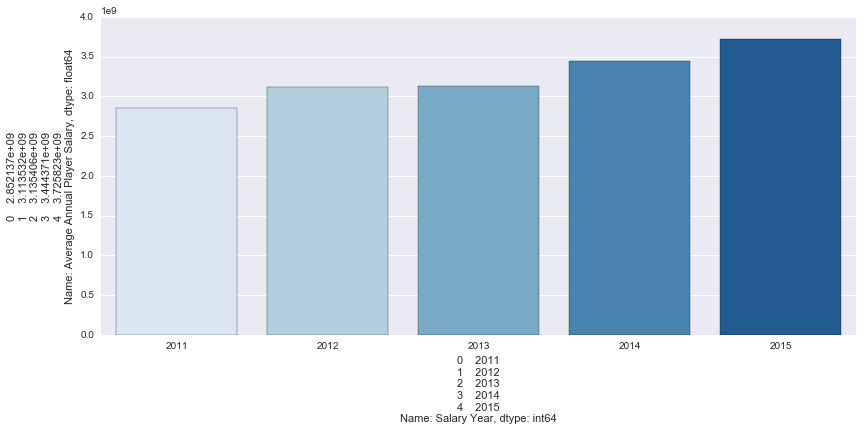

In [111]:
sns.factorplot(salaries_by_year['Salary Year'], salaries_by_year['Average Annual Player Salary'], data=df,kind="bar",palette="Blues",size=6,aspect=2,legend_out=False);


In [112]:
# Set position to prior year's
df['Position'] = df['Fielding_POS.1.Year-1']

# Add categorical value for multiple positions
df[df['Num Positions.Year-1'] > 1]['Position'] = 'MULTIPLE'
df.head()

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Player Id,Salary Year,Annual Salary,Contract Years,Salary Team,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,...,Team 2.Year-1,Team 3.Year-1,Team 4.Year-1,Team 5.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position
0,jbverlander,2015,25714285,7 (2013-19),DET,0.320,2.84,14.0,9.0,9.74,...,NaN,NaN,NaN,NaN,17.062557,4.571562e+06,5.624835,0.076900,1.356875,P
1,dzgreinke,2015,24500000,6 (2013-18),LAD,0.312,1.91,3.0,0.0,8.45,...,NaN,NaN,NaN,NaN,17.014184,4.571562e+06,5.359218,0.066282,1.404899,P
2,jhhamilton,2015,25000000,5 (2013-17),LAA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.034386,4.571562e+06,5.468590,NaN,NaN,LF
3,rjhoward,2015,25000000,5 (2012-16),PHI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.034386,4.571562e+06,5.468590,NaN,NaN,1B
4,cplee,2015,24000000,5 (2011-15),PHI,0.368,1.33,5.0,1.0,11.07,...,NaN,NaN,NaN,NaN,16.993564,4.571562e+06,5.249846,0.065100,1.338213,P


In [113]:
df.loc[df['Num Positions.Year-1'] > 1, 'Position'] = 'MULTIPLE'
df

,Player Id,Salary Year,Annual Salary,Contract Years,Salary Team,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,...,Team 2.Year-1,Team 3.Year-1,Team 4.Year-1,Team 5.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position
0,jbverlander,2015,25714285,7 (2013-19),DET,0.320,2.84,14.0,9.0,9.74,...,NaN,NaN,NaN,NaN,17.062557,4.571562e+06,5.624835,0.076900,1.356875,P
1,dzgreinke,2015,24500000,6 (2013-18),LAD,0.312,1.91,3.0,0.0,8.45,...,NaN,NaN,NaN,NaN,17.014184,4.571562e+06,5.359218,0.066282,1.404899,P
2,jhhamilton,2015,25000000,5 (2013-17),LAA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.034386,4.571562e+06,5.468590,NaN,NaN,MULTIPLE
3,rjhoward,2015,25000000,5 (2012-16),PHI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.034386,4.571562e+06,5.468590,NaN,NaN,1B
4,cplee,2015,24000000,5 (2011-15),PHI,0.368,1.33,5.0,1.0,11.07,...,NaN,NaN,NaN,NaN,16.993564,4.571562e+06,5.249846,0.065100,1.338213,P
5,fahernandez,2015,25000000,7 (2013-19),SEA,0.260,1.75,13.0,7.0,6.48,...,NaN,NaN,NaN,NaN,17.034386,4.571562e+06,5.468590,0.060736,1.325009,P
6,japujols,2015,24000000,10 (2012-21),LAA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.993564,4.571562e+06,5.249846,NaN,NaN,MULTIPLE
7,rjcano,2015,24000000,10 (2014-23),SEA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.993564,4.571562e+06,5.249846,NaN,NaN,2B
8,cekershaw,2015,30714286,7 (2014-20),LAD,0.281,1.41,3.0,1.0,6.31,...,NaN,NaN,NaN,NaN,17.240238,4.571562e+06,6.718553,0.071185,1.366311,P
9,psfielder,2015,23777778,9 (2012-20),TEX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.984262,4.571562e+06,5.201237,NaN,NaN,1B


In [114]:
# Add Start, End, Remaining years
#contract_years_df = df['Contract Years'].str.extract('(?P<num_years>[0-9]+)(\s+\((?P<start_year>[0-9]+\s*)-\s*(?P<end_year>[0-9]+))*\)')
#df['Contract Num Years'] = contract_years_df['num_years']
#df['Contract Start Year']
#df['Contract Num Years'] = contract_years_df['num_years']
#df['Start Year'] = contract_years_df['start_year']
#df

## Team Payrolls

In [115]:
team_payrolls_df = pd.read_csv(os.path.join("data", "db", "TeamPayrolls.csv"))
team_payrolls_df = team_payrolls_df.drop('Team', 1)
team_payrolls_df = team_payrolls_df.rename(index=str, columns={'Team (Abbreviated)' : 'Team'})
grouped_team_payrolls = team_payrolls_df.groupby('Year')
avg_annual_payrolls = grouped_team_payrolls.mean()
avg_annual_payrolls = avg_annual_payrolls.reset_index()
avg_annual_payrolls = avg_annual_payrolls.rename(columns={'Payroll' : 'Avg Payroll'}) 
avg_annual_payrolls = pd.DataFrame(avg_annual_payrolls.reset_index(), columns=['Year', 'Avg Payroll'])

team_payrolls_df = pd.merge(team_payrolls_df, avg_annual_payrolls, on=['Year'])
team_payrolls_df['Scaled Team Payroll'] = team_payrolls_df['Payroll'] / team_payrolls_df['Avg Payroll']
team_payrolls_df.head()

,Year,Team,Payroll,Average,Median,Avg Payroll,Scaled Team Payroll
0,2011,NYY,201689030,6722968.0,NaN,92991718,2.168892
1,2011,PHI,172976381,5765879.0,NaN,92991718,1.860127
2,2011,BOS,161407476,5978055.0,NaN,92991718,1.735719
3,2011,LAA,138998524,4483823.0,NaN,92991718,1.494741
4,2011,CWS,129285539,4788353.0,NaN,92991718,1.390291


In [116]:
df = df.rename(index=str, columns={'Salary Team' : 'Team',
                              'Salary Year' : 'Year'})
# Merge with df
df = pd.merge(df, team_payrolls_df, on=['Team', 'Year'])
df = df.rename(index=str, columns={'Payroll' : 'Team Payroll'})
df.head()

,Player Id,Year,Annual Salary,Contract Years,Team,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,...,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position,Team Payroll,Average,Median,Avg Payroll,Scaled Team Payroll
0,jbverlander,2015,25714285,7 (2013-19),DET,0.320,2.84,14.0,9.0,9.74,...,4.571562e+06,5.624835,0.076900,1.356875,P,173813750,NaN,NaN,124707037,1.393777
1,jmcabrera,2015,29200000,10 (2014-23),DET,NaN,NaN,NaN,NaN,NaN,...,4.571562e+06,6.387313,NaN,NaN,MULTIPLE,173813750,NaN,NaN,124707037,1.393777
2,dtprice,2015,19750000,1 (2015),DET,0.929,4.33,44.0,14.0,25.15,...,4.571562e+06,4.320186,0.068843,1.318928,P,173813750,NaN,NaN,124707037,1.393777
3,aasanchez,2015,16000000,5 (2013-17),DET,0.280,2.14,14.0,9.0,7.71,...,4.571562e+06,3.499897,0.057631,1.477240,P,173813750,NaN,NaN,124707037,1.393777
4,imkinsler,2015,15000000,5 (2013-17),DET,NaN,NaN,NaN,NaN,NaN,...,4.571562e+06,3.281154,NaN,NaN,2B,173813750,NaN,NaN,124707037,1.393777


## Top 10 Highest Paid Players

In [117]:
# Biggest Salaries
df = df.sort(columns=['Scaled Salary'], ascending=False)
top_ten = df[:10]
top_ten[['Player Id', 'Year', 'Annual Salary', 'Scaled Salary', 'Batting_Career_Num_Seasons', 'Pitching_Career_Num_Seasons', 'Position']]

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Player Id,Year,Annual Salary,Scaled Salary,Batting_Career_Num_Seasons,Pitching_Career_Num_Seasons,Position
979,cekershaw,2012,30714286,7.970736,4,4,P
1623,aerodriguez,2011,27500000,7.597813,17,0,3B
2386,cekershaw,2014,30714286,7.249717,6,6,P
1650,vwells,2011,26187500,7.235190,12,0,MULTIPLE
815,aerodriguez,2012,27500000,7.136589,18,0,3B
3369,cekershaw,2013,30714286,6.974717,5,5,P
2576,jmcabrera,2014,29200000,6.892289,11,0,3B
25,cekershaw,2015,30714286,6.718553,7,7,P
1624,ccsabathia,2011,24285714,6.709757,10,10,P
1784,cplee,2011,24000000,6.630818,7,9,P


In [118]:
df[df['Player Id'] == 'magonzalez']

,Player Id,Year,Annual Salary,Contract Years,Team,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,...,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position,Team Payroll,Average,Median,Avg Payroll,Scaled Team Payroll


In [119]:
# Subset columns
df = pd.DataFrame(df, columns=['Player Id', 'Year', 'Annual Salary', 'Scaled Salary',
                               'Team Payroll', 'Scaled Team Payroll',
                               'Log Annual Salary', 'Contract Years', 'Position', 
                               'Batting_Career_Num_Seasons', 'Batting_Career_G', 'Batting_Career_AVG', 
                               'Batting_Career_PSN', 'Batting_Career_SB', 'Batting_Career_HR',
                               'Batting_Career_RBI', 
                               'Pitching_Career_Num_Seasons', 'Pitching_Career_G', 'Pitching_Career_ER',
                               'Pitching_Career_ERA', 'Pitching_Career_IP', 'Pitching_Career_SO',
                               'Pitching_Career_SHO', 'Pitching_Career_W', 'Pitching_Career_L',
                               'Pitching_Career_WPIP', 'Pitching_Career_GS', 'Pitching_Career_GSPFGP',
                               'Fielding_Career_Num_Seasons', 'Fielding_Career_G', 'Fielding_Career_FPCT', 
                               'Fielding_Career_A', 'Fielding_Career_PO', 'Fielding_Career_E'])
df.head()

,Player Id,Year,Annual Salary,Scaled Salary,Team Payroll,Scaled Team Payroll,Log Annual Salary,Contract Years,Position,Batting_Career_Num_Seasons,...,Pitching_Career_L,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E
979,cekershaw,2012,30714286,7.970736,95143575,0.970636,17.240238,7 (2014-20),P,4,...,28.0,0.065698,116.0,1.459323,4,118.0,0.984615,105.0,23.0,2.0
1623,aerodriguez,2011,27500000,7.597813,201689030,2.168892,17.129697,10 (2008-17),3B,17,...,0.0,NaN,0.0,NaN,17,2264.0,0.973296,5347.0,2635.0,219.0
2386,cekershaw,2014,30714286,7.249717,235295219,2.043699,17.240238,7 (2014-20),P,6,...,46.0,0.065332,182.0,1.389784,6,184.0,0.986111,174.0,39.0,3.0
1650,vwells,2011,26187500,7.235190,138998524,1.494741,17.080793,1 (2011),MULTIPLE,12,...,0.0,NaN,0.0,NaN,12,2734.0,0.993464,122.0,6262.0,42.0
815,aerodriguez,2012,27500000,7.136589,197962289,2.019572,17.129697,10 (2008-17),3B,18,...,0.0,NaN,0.0,NaN,18,2353.0,0.973297,5512.0,2689.0,225.0


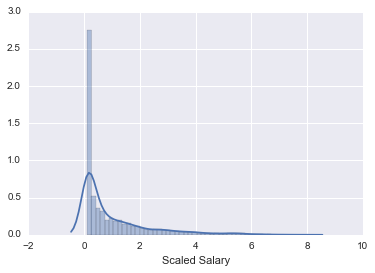

In [120]:
sns.distplot(df['Scaled Salary'])

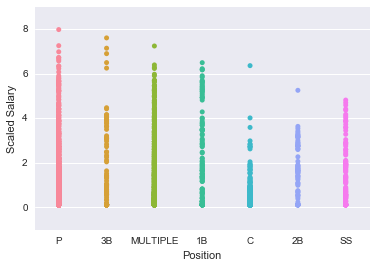

In [121]:
sns.stripplot(x="Position", y="Scaled Salary", data=df)


## Salary vs. Team Payroll

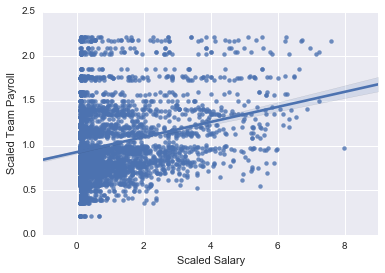

In [122]:
sns.regplot(x='Scaled Salary', y='Scaled Team Payroll', scatter=True, data=df)

In [123]:
df.corr()

,Year,Annual Salary,Scaled Salary,Team Payroll,Scaled Team Payroll,Log Annual Salary,Batting_Career_Num_Seasons,Batting_Career_G,Batting_Career_AVG,Batting_Career_PSN,...,Pitching_Career_L,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E
Year,1.000000,0.058067,-0.002662,0.256009,-0.007939,0.068348,-0.020522,-0.034137,-0.036742,-0.026127,...,0.000559,-0.032209,0.005104,-0.000254,-0.029245,-0.028385,-0.004266,-0.029026,-0.019972,-0.030587
Annual Salary,0.058067,1.000000,0.994205,0.275919,0.271434,0.873232,0.509327,0.437462,0.102923,0.462263,...,0.289158,0.139012,0.345122,0.265609,0.494735,0.426374,0.069213,0.263895,0.381160,0.360103
Scaled Salary,-0.002662,0.994205,1.000000,0.261193,0.273907,0.871057,0.510637,0.439942,0.104596,0.465106,...,0.287884,0.138119,0.343079,0.264603,0.495787,0.429396,0.069736,0.265098,0.382350,0.362069
Team Payroll,0.256009,0.275919,0.261193,1.000000,0.958014,0.230217,0.159782,0.113377,0.035716,0.176134,...,0.072607,0.033587,0.085854,-0.032319,0.153438,0.112494,0.004845,0.082307,0.090776,0.070083
Scaled Team Payroll,-0.007939,0.271434,0.273907,0.958014,1.000000,0.223536,0.176035,0.128938,0.048023,0.188423,...,0.078378,0.045611,0.090465,-0.033179,0.171414,0.126331,0.003433,0.093648,0.101520,0.081591
Log Annual Salary,0.068348,0.873232,0.871057,0.230217,0.223536,1.000000,0.600271,0.469781,0.072196,0.462423,...,0.323786,0.156819,0.331101,0.230903,0.585534,0.455214,0.075052,0.275318,0.357908,0.354296
Batting_Career_Num_Seasons,-0.020522,0.509327,0.510637,0.159782,0.176035,0.600271,1.000000,0.735325,0.122452,0.523533,...,0.344107,0.061240,0.297990,0.071192,0.946604,0.656754,0.106252,0.444958,0.485575,0.532974
Batting_Career_G,-0.034137,0.437462,0.439942,0.113377,0.128938,0.469781,0.735325,1.000000,0.392406,0.745742,...,-0.237563,-0.011832,-0.208238,-0.234890,0.659475,0.872716,0.205207,0.613359,0.761436,0.780138
Batting_Career_AVG,-0.036742,0.102923,0.104596,0.035716,0.048023,0.072196,0.122452,0.392406,1.000000,0.346685,...,-0.332383,0.030291,-0.252302,0.068372,0.067862,0.347626,0.320613,0.252769,0.360106,0.355894
Batting_Career_PSN,-0.026127,0.462263,0.465106,0.176134,0.188423,0.462423,0.523533,0.745742,0.346685,1.000000,...,-0.202279,-0.105327,-0.196390,-0.537968,0.495744,0.767617,0.111346,0.453166,0.443158,0.626838


## Examine Pitchers



In [124]:
# Divide into quantiles
quantiles = pd.qcut(df['Scaled Salary'], 10, labels=['q' + str(x+1) for x in range(10)])
df['Salary Quantile'] = quantiles
df[df['Salary Quantile'] == 'q10']

,Player Id,Year,Annual Salary,Scaled Salary,Team Payroll,Scaled Team Payroll,Log Annual Salary,Contract Years,Position,Batting_Career_Num_Seasons,...,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E,Salary Quantile
979,cekershaw,2012,30714286,7.970736,95143575,0.970636,17.240238,7 (2014-20),P,4,...,0.065698,116.0,1.459323,4,118.0,0.984615,105.0,23.0,2.0,q10
1623,aerodriguez,2011,27500000,7.597813,201689030,2.168892,17.129697,10 (2008-17),3B,17,...,NaN,0.0,NaN,17,2264.0,0.973296,5347.0,2635.0,219.0,q10
2386,cekershaw,2014,30714286,7.249717,235295219,2.043699,17.240238,7 (2014-20),P,6,...,0.065332,182.0,1.389784,6,184.0,0.986111,174.0,39.0,3.0,q10
1650,vwells,2011,26187500,7.235190,138998524,1.494741,17.080793,1 (2011),MULTIPLE,12,...,NaN,0.0,NaN,12,2734.0,0.993464,122.0,6262.0,42.0,q10
815,aerodriguez,2012,27500000,7.136589,197962289,2.019572,17.129697,10 (2008-17),3B,18,...,NaN,0.0,NaN,18,2353.0,0.973297,5512.0,2689.0,225.0,q10
3369,cekershaw,2013,30714286,6.974717,216597577,2.096954,17.240238,7 (2014-20),P,5,...,0.064715,149.0,1.422661,5,151.0,0.988950,147.0,32.0,2.0,q10
2576,jmcabrera,2014,29200000,6.892289,162228527,1.409065,17.189679,10 (2014-23),3B,11,...,NaN,0.0,NaN,11,1979.0,0.981539,1525.0,6397.0,149.0,q10
25,cekershaw,2015,30714286,6.718553,272789040,2.187439,17.240238,7 (2014-20),P,7,...,0.071185,209.0,1.366311,7,211.0,0.980545,205.0,47.0,5.0,q10
1624,ccsabathia,2011,24285714,6.709757,201689030,2.168892,17.005399,1 (2011),P,10,...,0.073195,357.0,1.351590,10,357.0,0.956522,246.0,40.0,13.0,q10
1784,cplee,2011,24000000,6.630818,172976381,1.860127,16.993564,5 (2011-15),P,7,...,0.069208,280.0,1.362530,9,284.0,0.922764,147.0,80.0,19.0,q10


In [125]:
pitchers = df[df['Pitching_Career_G'] > 100]
# Divide into quantiles
quantiles = pd.qcut(df['Scaled Salary'], 10, labels=['q' + str(x+1) for x in range(10)])
df['Salary Quantile'] = quantiles
top_pitchers = pitchers[pitchers['Salary Quantile'] == 'q10']
top_pitchers = pd.DataFrame(top_pitchers, columns=['Player Id', 'Salary Year', 'Annual Salary', 'Scaled Salary', 'Pitching_Career_G', 'Pitching_Career_ERA', 'Pitching_Career_IP', 'Pitching_Career_WPIP'])
top_pitchers[:10]

,Player Id,Salary Year,Annual Salary,Scaled Salary,Pitching_Career_G,Pitching_Career_ERA,Pitching_Career_IP,Pitching_Career_WPIP
979,cekershaw,NaN,30714286,7.970736,118.0,2.880906,715.4,0.065698
2386,cekershaw,NaN,30714286,7.249717,184.0,2.603937,1178.6,0.065332
3369,cekershaw,NaN,30714286,6.974717,151.0,2.797581,942.6,0.064715
25,cekershaw,NaN,30714286,6.718553,211.0,2.484201,1376.7,0.071185
1624,ccsabathia,NaN,24285714,6.709757,357.0,3.483089,2377.2,0.073195
1784,cplee,NaN,24000000,6.630818,284.0,3.703163,1849.5,0.069208
239,mmscherzer,NaN,30000000,6.562308,207.0,3.584875,1237.7,0.073523
817,ccsabathia,NaN,24400000,6.332101,390.0,3.439162,2614.3,0.073825
1703,jasantana,NaN,22916667,6.331511,339.0,3.106867,1906.1,0.069776
1041,cplee,NaN,24000000,6.228296,316.0,3.558150,2081.7,0.069655


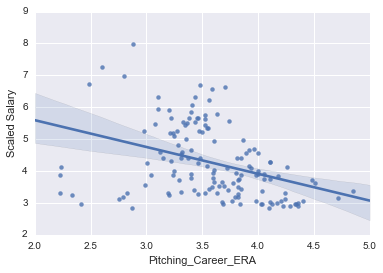

In [126]:
sns.regplot(x='Pitching_Career_ERA', y='Scaled Salary', scatter=True, data=top_pitchers)

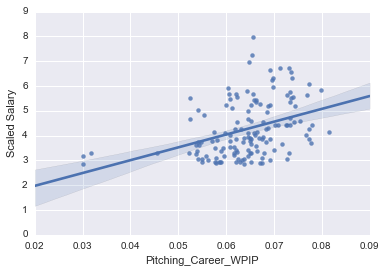

In [127]:
sns.regplot(x='Pitching_Career_WPIP', y='Scaled Salary', scatter=True, data=top_pitchers)

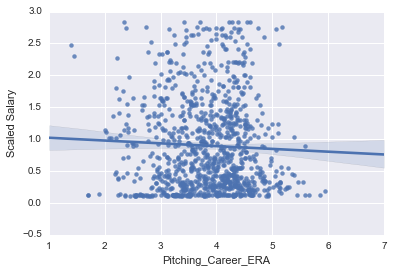

In [128]:
# All other pitchers?
sns.regplot(x='Pitching_Career_ERA', y='Scaled Salary', 
            scatter=True, 
            data=pitchers[pitchers['Salary Quantile'] != 'q10'])

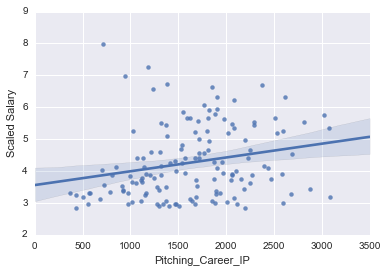

In [129]:
sns.regplot(x='Pitching_Career_IP', y='Scaled Salary', scatter=True, data=top_pitchers)

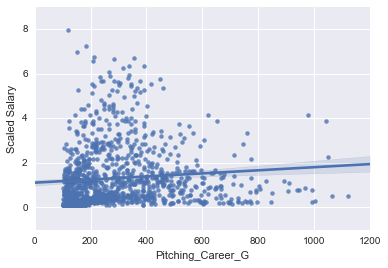

In [130]:
sns.regplot(x='Pitching_Career_G', y='Scaled Salary', scatter=True, data=pitchers)

In [131]:
pitching_df = pd.DataFrame(pitchers, columns=['Scaled Salary', 'Pitching_Career_WPIP', 'Pitching_Career_IP',
                                              'Pitching_Career_W', 'Pitching_Career_L', 'Pitching_Career_ERA', 'Pitching_Career_SO',
                                              'Pitching_Career_SHO', 'Pitching_Career_Num_Seasons', 'Pitching_Career_G',
                                              'Pitching_Career_GS', 'Pitching_Career_GSPFGP'
                                             ])
pitching_df.corr()
                           

,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_IP,Pitching_Career_W,Pitching_Career_L,Pitching_Career_ERA,Pitching_Career_SO,Pitching_Career_SHO,Pitching_Career_Num_Seasons,Pitching_Career_G,Pitching_Career_GS,Pitching_Career_GSPFGP
Scaled Salary,1.000000,0.286365,0.605789,0.638544,0.509504,-0.148277,0.687450,0.625037,0.354506,0.090034,0.593136,0.447282
Pitching_Career_WPIP,0.286365,1.000000,0.236314,0.358435,0.174984,-0.186970,0.261462,0.261385,0.058706,-0.050987,0.259526,0.224969
Pitching_Career_IP,0.605789,0.236314,1.000000,0.981130,0.966891,0.198230,0.960828,0.823327,0.752178,0.316372,0.959004,0.637297
Pitching_Career_W,0.638544,0.358435,0.981130,1.000000,0.920289,0.134458,0.954817,0.850222,0.701590,0.266710,0.949022,0.624958
Pitching_Career_L,0.509504,0.174984,0.966891,0.920289,1.000000,0.305401,0.909253,0.733403,0.748309,0.322834,0.933225,0.655360
Pitching_Career_ERA,-0.148277,-0.186970,0.198230,0.134458,0.305401,1.000000,0.107594,0.056454,0.208749,-0.055169,0.254258,0.441329
Pitching_Career_SO,0.687450,0.261462,0.960828,0.954817,0.909253,0.107594,1.000000,0.809838,0.728141,0.327908,0.913429,0.604411
Pitching_Career_SHO,0.625037,0.261385,0.823327,0.850222,0.733403,0.056454,0.809838,1.000000,0.486538,0.062911,0.826935,0.536537
Pitching_Career_Num_Seasons,0.354506,0.058706,0.752178,0.701590,0.748309,0.208749,0.728141,0.486538,1.000000,0.756355,0.581896,0.259399
Pitching_Career_G,0.090034,-0.050987,0.316372,0.266710,0.322834,-0.055169,0.327908,0.062911,0.756355,1.000000,0.049381,-0.279200


Columns we could use for a model have a low correlation with each other and a high correlation with the variable we are predicting. Some candidates appear to be:

Pitching_Career_SO (or Pitching_Career_IP, Pitching_Career_GS)
Pitching_Career_ERA

We might want to look at quartiles and see if these relationships hold or are different. For example, ERA has a stronger effect for top pitchers than for all pitchers. 

What about fielding percentage and other fielding metrics? We'll look at that in the section below.

## Model just pitchers


In [132]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

X = np.asarray(pd.DataFrame(pitchers, columns=['Pitching_Career_SO', 'Pitching_Career_ERA']))
y = np.asarray(pitchers['Scaled Salary'])
regr = linear_model.LinearRegression()

# Simple train/test split
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=55)
regr.fit(x_train, y_train)
score = regr.score(x_test, y_test)
print(score)

# K-fold group cross-validation
pitchers.sort(['Player Id'], inplace=True)
players = list(pitchers['Player Id'].values)

groups = [players.index(row['Player Id']) for index, row in pitchers.iterrows()]
score = cross_val_score(regr, X, y, groups, cv=GroupKFold(n_splits=5))



C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\pandas\core\frame.py:3225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


0.523098876278


## Examine Batting

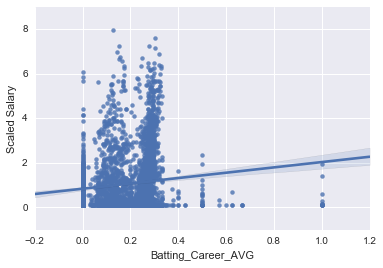

In [133]:
sns.regplot(x='Batting_Career_AVG', y='Scaled Salary', scatter=True, data=df)

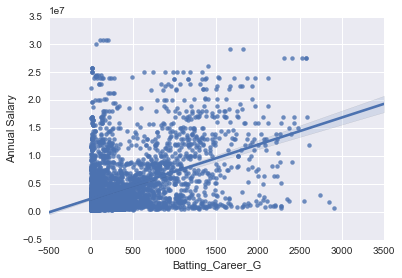

In [134]:
sns.regplot(x='Batting_Career_G', y='Annual Salary', scatter=True, data=df)

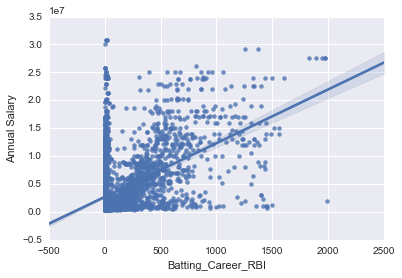

In [144]:
sns.regplot(x='Batting_Career_RBI', y='Annual Salary', scatter=True, data=df)

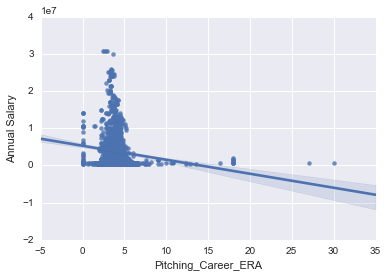

In [135]:
pitching_df = pd.DataFrame(df[df['Pitching_Career_G'] > 0])
sns.regplot(x='Pitching_Career_ERA', y='Annual Salary', scatter=True, data=df)

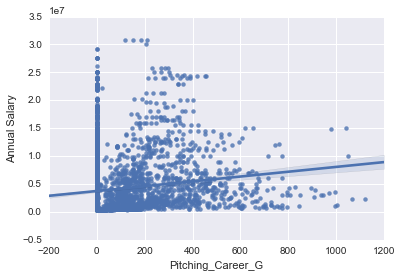

In [136]:
pitching_df = pd.DataFrame(df[df['Pitching_Career_G'] > 0])
sns.regplot(x='Pitching_Career_G', y='Annual Salary', scatter=True, data=df)

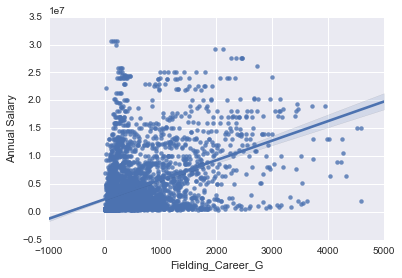

In [137]:
fielding_df = pd.DataFrame(df[df['Fielding_Career_G'] > 0])
sns.regplot(x='Fielding_Career_G', y='Annual Salary', scatter=True, data=df)

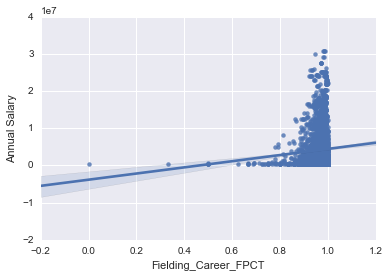

In [138]:
sns.regplot(x='Fielding_Career_FPCT', y='Annual Salary', scatter=True, data=df)

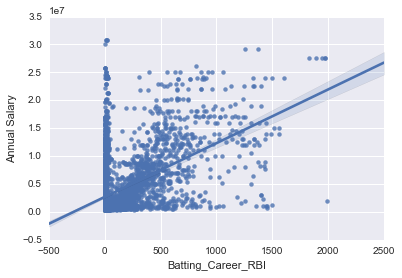

In [139]:
sns.regplot(x='Batting_Career_RBI', y='Annual Salary', scatter=True, data=df)
#batting_df['Batting_Career_RBI']

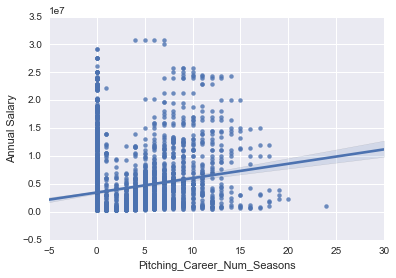

In [140]:
sns.regplot(x='Pitching_Career_Num_Seasons', y='Annual Salary', scatter=True, data=df)

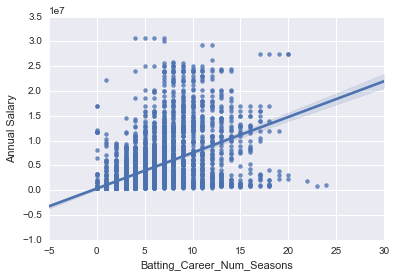

In [141]:
sns.regplot(x='Batting_Career_Num_Seasons', y='Annual Salary', scatter=True, data=df)

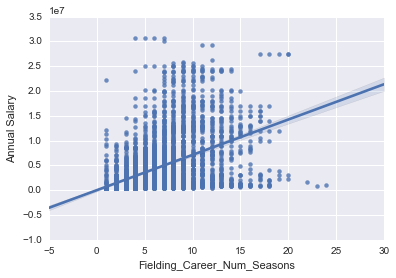

In [142]:
sns.regplot(x='Fielding_Career_Num_Seasons', y='Annual Salary', scatter=True, data=df)